0            5.265553
1            5.554567
2            5.850662
3            6.144279
4            6.437186
             ...     
11987    57998.075500
11988    58004.831718
11989    58010.919141
11990    58017.366881
11991    58021.113897
Name: time, Length: 11992, dtype: float64


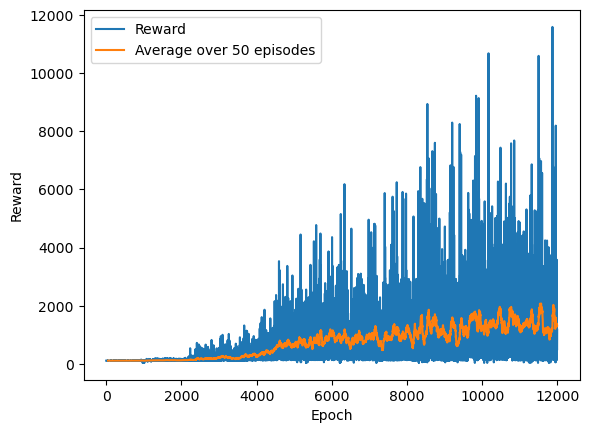

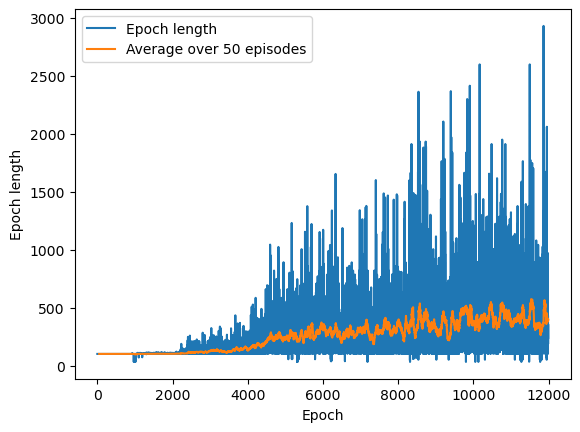

Time Steps:3065116


In [3]:
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd
import numpy as np
import os


path = "agents/euclid_3_20_3milsteps/best_model"
num_average = 50

df = pd.read_csv(os.path.join(path, "monitor.csv"), names=["Reward", "Epoch length", "time"], skiprows=[0, 1])
print(df["time"])
df['RewardAverage'] = df['Reward'].rolling(num_average).mean()
df["Reward"].plot()
df['RewardAverage'].plot.line(label="Average over {} episodes".format(num_average))
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.legend()
plt.savefig(os.path.join(path, "rewards.png"))
np.savetxt(os.path.join(path, "reward_avg.txt"),df['RewardAverage'])
plt.show()
plt.close()

df['EpochAverage'] = df['Epoch length'].rolling(num_average).mean()
df["Epoch length"].plot()
df["EpochAverage"].plot.line(label="Average over {} episodes".format(num_average))
plt.xlabel("Epoch")
plt.ylabel("Epoch length")
plt.legend()
plt.savefig(os.path.join(path, "epoch length.png"))
np.savetxt(os.path.join(path, "epoch_length_avg.txt"),df['EpochAverage'])
plt.show()
plt.close()

print('Time Steps:'+str(df['Epoch length'].sum()))


In [109]:
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.ndimage import uniform_filter1d
import numpy as np
import os
%matplotlib widget

path = "251b_project/running_averages/"
#data = np.loadtxt(os.path.join(path, "epoch_length_avg.txt"))
#plt.plot(data)
#plt.show()

files = os.listdir(path)

for f in files:
    
    dfs = os.listdir(path+f+'/')
    
    ela = np.loadtxt(path+f+'/'+dfs[0])
    x = np.arange(0,ela.shape[0])
    
    kernel_size = 500
    kernel = np.ones(kernel_size) / kernel_size
    data_convolved = np.convolve(ela, kernel, mode='same')    
    
    
    #plt.plot(x,ela)
    plt.plot(data_convolved[0:-250],label=f)

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Epoch length")
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [46]:
files

['gauss_agent', 'positional_component', 'euclidean_agent', 'sparse']